# Plot downsampled hour-long 3C envelope functions of all stations

In [18]:
# Import modules
from scipy.signal import hilbert
from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta, to_datetime
from os.path import join

from utils_basic import ROOTDIR_GEO, GEO_STATIONS, GEO_COMPONENTS, days_to_timestamps, save_figure
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_plot import plot_3c_seismograms

In [19]:
# Inputs
rootdir = ROOTDIR_GEO
starttime = Timestamp("2020-01-13T19:00:00")

freqmin = 5.0
freqmax = None

samprat_plot = 1 # sampling rate for plotting

scale = 1e-2 # Scale factor for plotting

linewidth_wf = 1
linewidth_box = 1.5

xdim_per_comp = 7
ydim_per_sta = 0.3

scale_bar_amp = 50

timemin_box1 = Timestamp("2020-01-13T19:35:00Z")
timemax_box1 = Timestamp("2020-01-13T19:37:00Z")

timemin_box2 = Timestamp("2020-01-13T19:56:00Z")
timemax_box2 = Timestamp("2020-01-13T19:58:00Z")


In [20]:
# Read and filter the data
stream = read_and_process_windowed_geo_waveforms(starttime, 3600.0, freqmin, freqmax)

In [21]:
# Compute the envelopes
stream_env = stream.copy()

for i, trace in enumerate(stream_env):
    data = trace.data
    envelope = abs(hilbert(data))
    trace.data = envelope
    stream_env[i] = trace

In [22]:
# Filter and downsample the envelopes
stream_env.resample(samprat_plot)

110 Trace(s) in Stream:

7F.A01..GHZ | 2020-01-13T19:00:00.000000Z - 2020-01-13T19:59:59.000000Z | 1.0 Hz, 3600 samples
...
(108 other traces)
...
7F.B20..GH2 | 2020-01-13T19:00:00.000000Z - 2020-01-13T19:59:59.000000Z | 1.0 Hz, 3600 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

Could not find A12.GHZ
Could not find A12.GH1
Could not find A12.GH2
Could not find A18.GH1


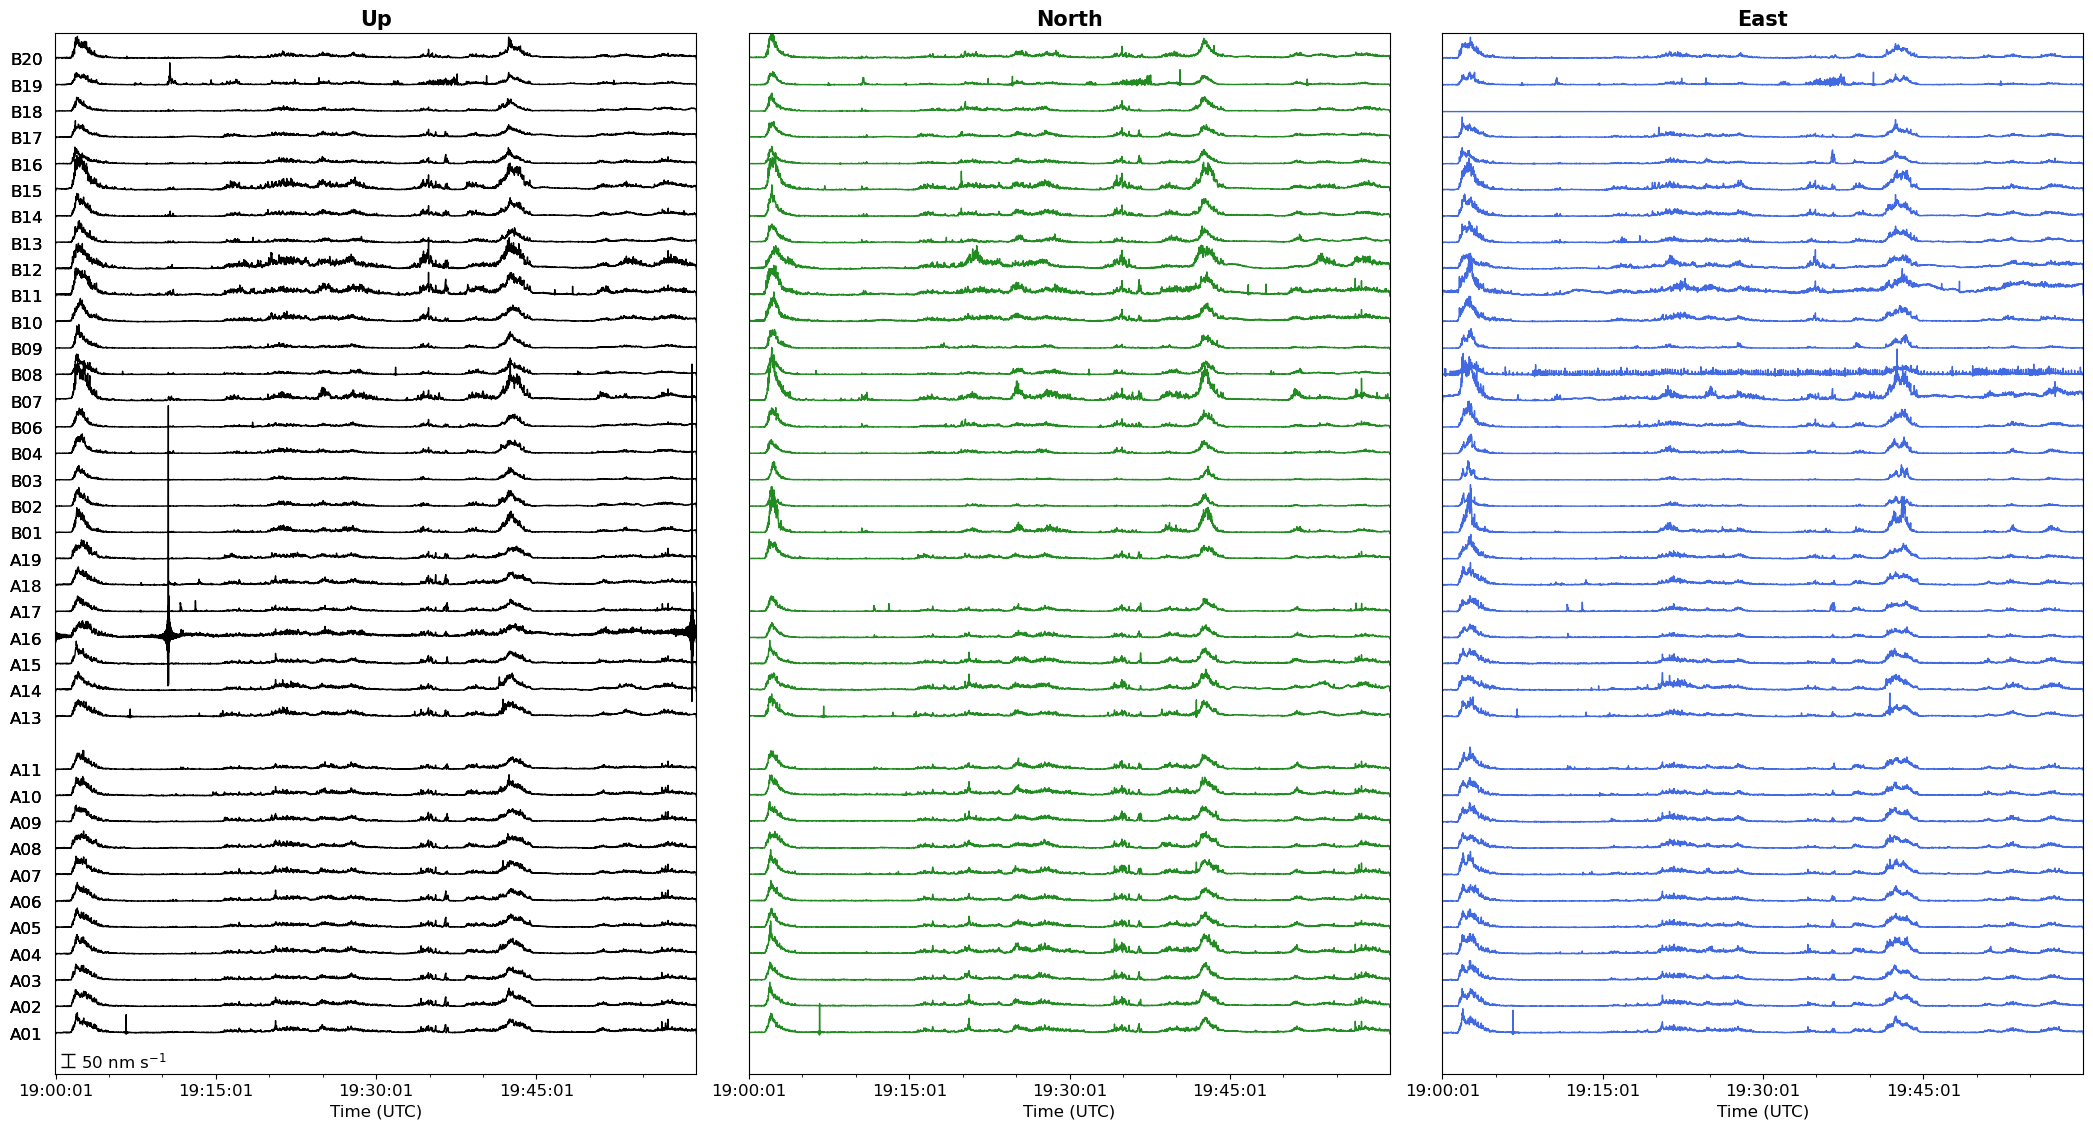

In [23]:
fig, axes = plot_3c_seismograms(stream_env,  xdim_per_comp=xdim_per_comp, ydim_per_sta=ydim_per_sta, scale=scale, linewidth=linewidth_wf, scale_bar_amp=scale_bar_amp, major_tick_spacing=900, minor_tick_spacing=300)

In [25]:
# Add boxes
numsta = len(GEO_STATIONS)

for ax in axes:
    box1 = Rectangle((timemin_box1, -0.5), timemax_box1 - timemin_box1, numsta, linewidth=linewidth_box, edgecolor="red", facecolor="none")
    box2 = Rectangle((timemin_box2, -0.5), timemax_box2 - timemin_box2, numsta, linewidth=linewidth_box, edgecolor="red", facecolor="none")
    ax.add_patch(box1)
    ax.add_patch(box2)

In [ ]:
# # Plotting
# stations_to_plot = GEO_STATIONS
# numsta = len(stations_to_plot)
# fig, axes = subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 0.25*numsta))

# ## Loop over the stations
# for i, station in enumerate(stations_to_plot):

#     for component in GEO_COMPONENTS:
#         try:
#             trace = stream_env.select(station=station, channel=f"*{component}")[0]
#             data = trace.data * scale + i
#         except:
#             print(f"Could not find {station}.GH{component}")
#             continue

#         ### Convert the time axis to Pandas Timestamps
#         timeax = trace.times("matplotlib")
#         timeax = days_to_timestamps(timeax)

#         if component == "Z":
#             axes[0].plot(timeax, data, color="black", linewidth=linewidth)
#         elif component == "1":
#             axes[1].plot(timeax, data, color="forestgreen", linewidth=linewidth)
#         elif component == "2":
#             axes[2].plot(timeax, data, color="royalblue", linewidth=linewidth)

#         axes[0].text(timeax[0]-Timedelta(minutes=1), i, station, fontsize=12, verticalalignment="center", horizontalalignment="right")

# axes[0].axvline(x=to_datetime("2020-01-13T19:36:30"), color="red", linestyle="--", linewidth=linewidth)
# axes[1].axvline(x=to_datetime("2020-01-13T19:36:30"), color="red", linestyle="--", linewidth=linewidth)
# axes[2].axvline(x=to_datetime("2020-01-13T19:36:30"), color="red", linestyle="--", linewidth=linewidth)

# ## Set the x-axis limits
# axes[0].set_xlim([timeax[0], timeax[-1]])
# axes[1].set_xlim([timeax[0], timeax[-1]])
# axes[2].set_xlim([timeax[0], timeax[-1]])

# ## Format x-axis as date time
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%dT%H:%M:%S'))
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%dT%H:%M:%S'))
# axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%dT%H:%M:%S'))

# for label in axes[0].get_xticklabels():
#     label.set_fontsize(12)
#     label.set_verticalalignment('top')
#     label.set_horizontalalignment('right')
#     label.set_rotation(10)

# for label in axes[1].get_xticklabels():
#     label.set_fontsize(12)
#     label.set_verticalalignment('top')
#     label.set_horizontalalignment('right')
#     label.set_rotation(10)

# for label in axes[2].get_xticklabels():
#     label.set_fontsize(12)
#     label.set_verticalalignment('top')
#     label.set_horizontalalignment('right')
#     label.set_rotation(10)

# # Set titles
# axes[0].set_title("Up", fontsize=15, fontweight="bold")
# axes[1].set_title("North", fontsize=15, fontweight="bold")
# axes[2].set_title("East", fontsize=15, fontweight="bold")

# # Set x label spacing to 60 seconds
# axes[0].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
# axes[1].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
# axes[2].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# # Turn off the y-axis labels and ticks
# axes[0].set_yticks([])
# axes[1].set_yticks([])
# axes[2].set_yticks([])

# axes[0].set_yticklabels([])
# axes[1].set_yticklabels([])
# axes[2].set_yticklabels([])

# fig.tight_layout()
# fig.patch.set_alpha(0.0)


In [26]:
## Save the figure
timestr = starttime.strftime("%Y-%m-%d-%H")

if freqmin is not None and freqmax is not None:
    figname = f"sample_hourly_waveforms_whole_array_{timestr}_bp{freqmin:.0f}to{freqmax:.0f}hz.png"
elif freqmin is not None and freqmax is None:
    figname = f"sample_hourly_waveforms_whole_array_{timestr}_hp{freqmin:.0f}hz.png"
elif freqmin is None and freqmax is not None:
    figname = f"sample_hourly_waveforms_whole_array_{timestr}_lp{freqmax:.0f}hz.png"

figname = f"sample_hourly_waveforms_whole_array_{timestr}.png"

save_figure(fig, figname)

Figure saved to /Volumes/OmanData/data/geophones/sample_hourly_waveforms_whole_array_2020-01-13-19.png
